<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205/IntroductionKerasMNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
# Step 1: Load the raw data
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# Step 2: Build the training/testing pipelines
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label #tf.one_hot(label, 10)

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Step 3: Create the model
inp = tf.keras.layers.Input(shape=(28, 28,1))
b = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding='same')(inp)
b = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same')(b)
b = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same')(b)
b = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same')(b)

b = tf.keras.layers.GlobalAveragePooling2D()(b)
b = tf.keras.layers.Dropout(0.3)(b)
b = tf.keras.layers.Dense(32, activation='relu')(b)
out = tf.keras.layers.Dense(10, activation='softmax')(b)

model = tf.keras.models.Model(inp, out)

# Summary of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0     

In [ ]:
# # Step 3: Create the model
# inp = tf.keras.layers.Input(shape=(28,28,))
# b = tf.keras.layers.Flatten()(inp)
# b = tf.keras.layers.Dense(128, activation='relu')(b)
# b = tf.keras.layers.Dense(128, activation='relu')(b)
# out = tf.keras.layers.Dense(10, activation='softmax')(b)

# model = tf.keras.models.Model(inp, out)

# # Summary of the model
# model.summary()

In [ ]:
# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

In [ ]:
# Step 4: Train the model
hist = model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_test,
    callbacks=tf.keras.callbacks.EarlyStopping(patience=5)
)

Epoch 1/50
469/469 [==============================] - 13s 7ms/step - loss: 0.7729 - accuracy: 0.7698 - val_loss: 0.2245 - val_accuracy: 0.9325
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2679 - accuracy: 0.9201 - val_loss: 0.1871 - val_accuracy: 0.9432
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2222 - accuracy: 0.9325 - val_loss: 0.1648 - val_accuracy: 0.9514
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1977 - accuracy: 0.9410 - val_loss: 0.1552 - val_accuracy: 0.9549
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1761 - accuracy: 0.9468 - val_loss: 0.1433 - val_accuracy: 0.9545
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1729 - accuracy: 0.9477 - val_loss: 0.1312 - val_accuracy: 0.9604
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1597 - accuracy: 0.9508 - val_loss: 0.1389 - val_accuracy: 0.9601
Epoch

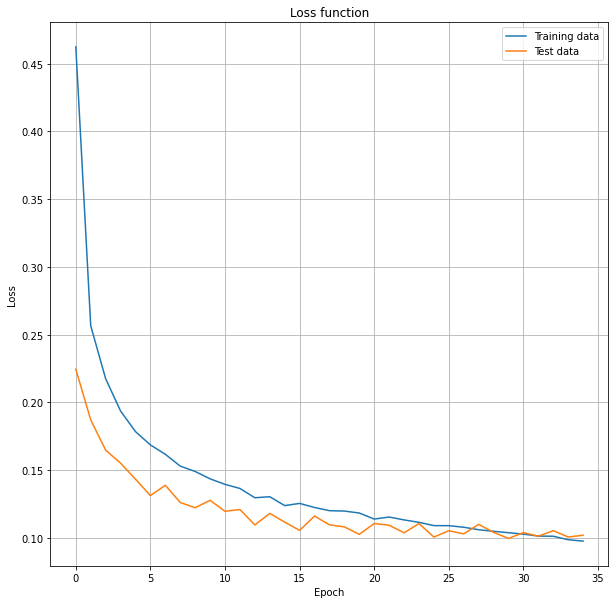

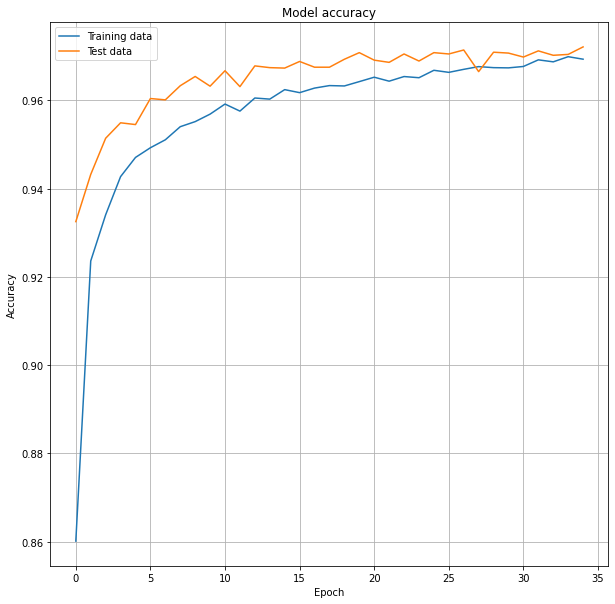

In [ ]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Test data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Test data'])

In [ ]:
# Step 5/6: Evaluate the model (we do no hyperparameter tuning here)
loss_accuracy = model.evaluate(ds_test, verbose=0)

print("Test Loss: {}".format(loss_accuracy[0]))
print("Test Accuracy: {}".format(loss_accuracy[1]))

Test Loss: 0.10196434706449509
Test Accuracy: 0.972100019454956
